In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from sklearn.decomposition import PCA

In [2]:
dfc = pd.read_csv('df_combinado.csv')
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   ADSL                          984 non-null    int64  
 4   Cablemodem                    984 non-null    int64  
 5   Fibra óptica                  984 non-null    int64  
 6   Wireless                      984 non-null    int64  
 7   Otros                         984 non-null    int64  
 8   Total conexion                984 non-null    int64  
 9   Accesos por cada 100 hab      984 non-null    int64  
 10  Accesos por cada 100 hogares  984 non-null    float64
 11  Banda ancha fija              984 non-null    int64  
 12  Dial up                       984 non-null    float64
 13  Hasta

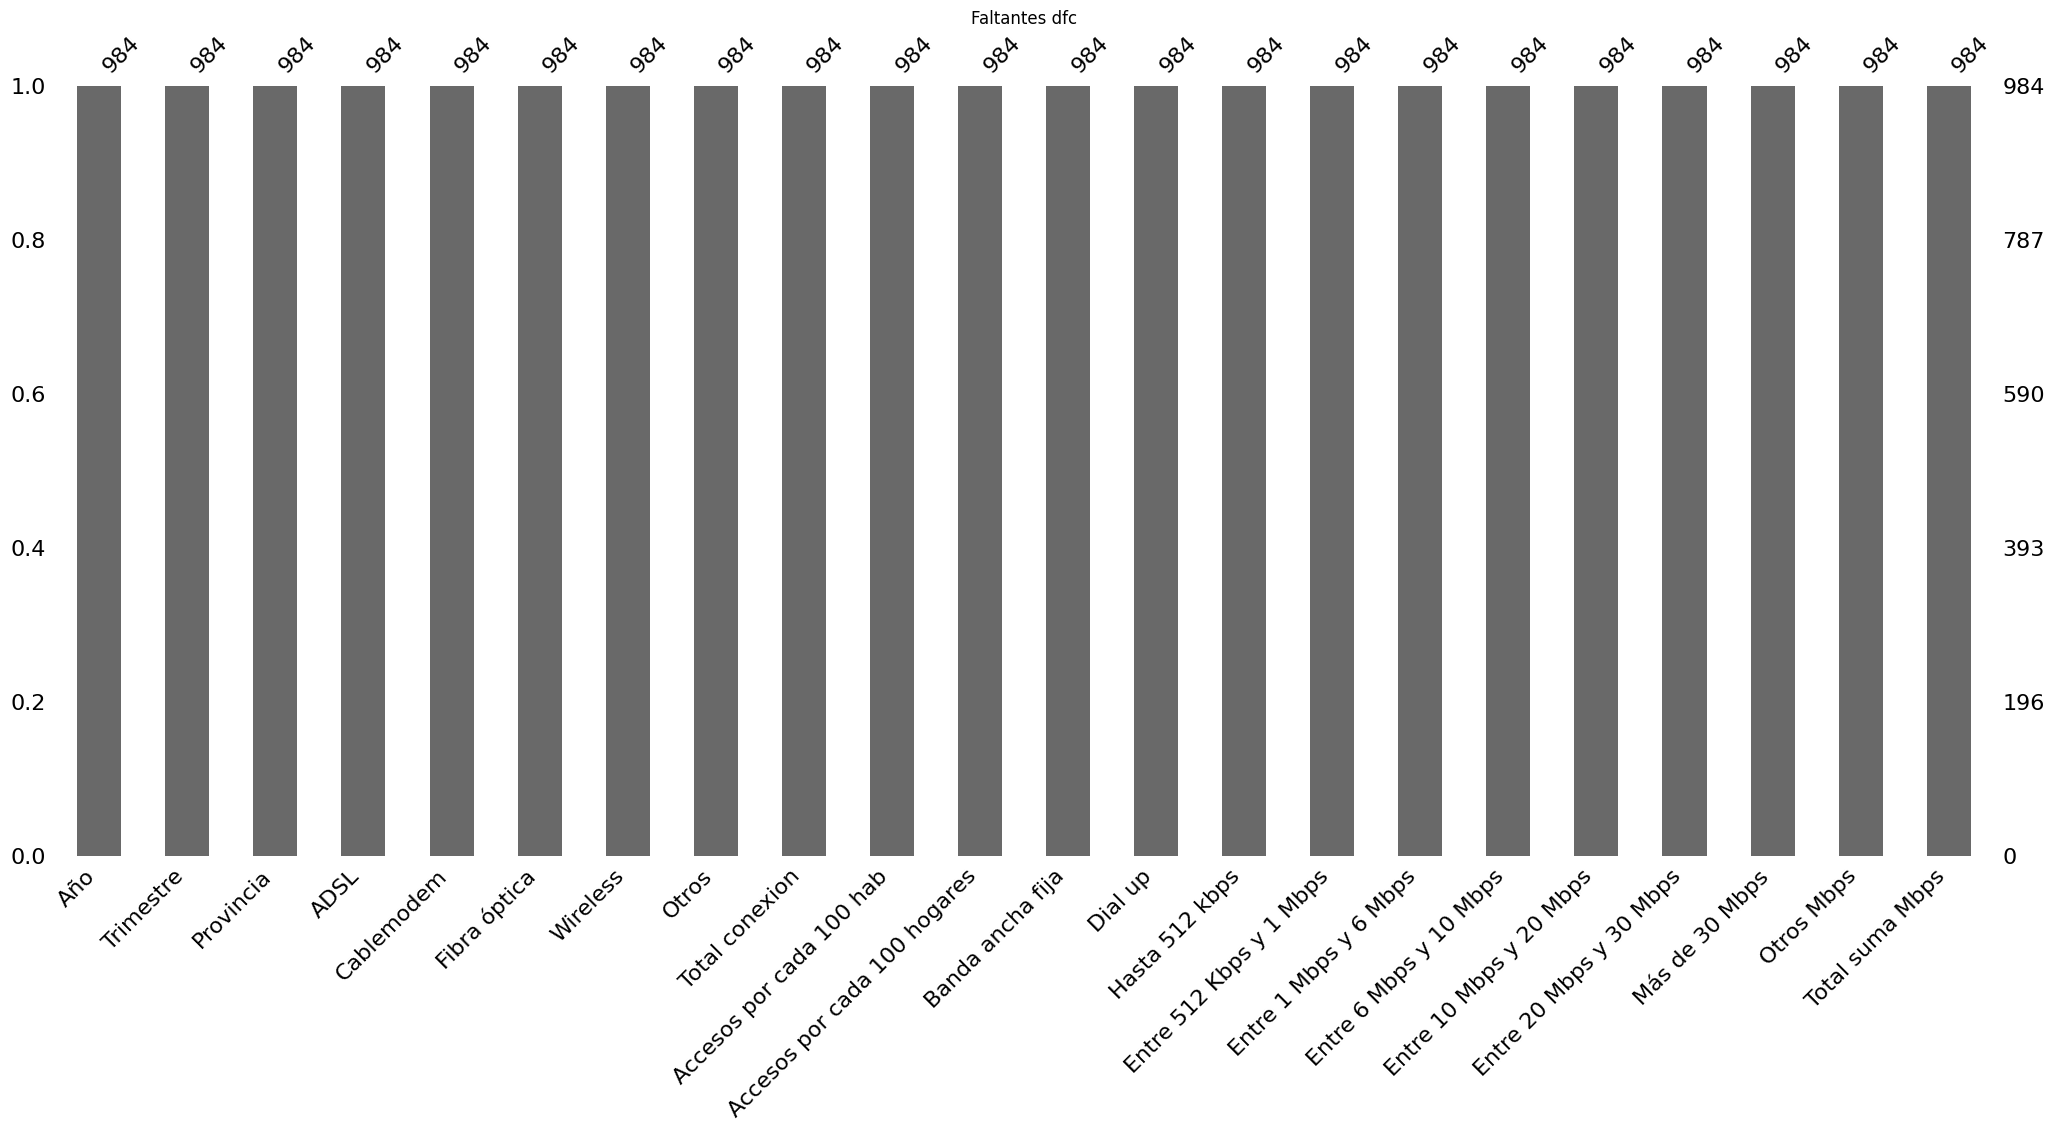

In [3]:
msno.bar(dfc)
plt.title('Faltantes dfc')
plt.show()

In [4]:
# Tipos de conexion
col = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
dfest = dfc[col].describe()
print(dfest)

               ADSL    Cablemodem  Fibra óptica       Wireless          Otros
count  9.840000e+02  9.840000e+02  9.840000e+02     984.000000     984.000000
mean   1.150317e+05  1.832892e+05  4.728246e+04   12385.282520    6556.766260
std    2.385989e+05  4.500403e+05  1.762796e+05   20996.226278   11567.922012
min    2.827000e+03  0.000000e+00  0.000000e+00       0.000000       2.000000
25%    2.076400e+04  1.085600e+04  3.540000e+02     734.000000     332.000000
50%    4.452300e+04  4.014950e+04  2.581000e+03    5105.500000    1901.000000
75%    9.148125e+04  7.582350e+04  2.554050e+04   14034.750000    7546.500000
max    1.586343e+06  2.797700e+06  1.799013e+06  150290.000000  101294.000000


Observamos practicamente una igual cantidad de datos para los tipos de conexiones. En promedio es mayor para Cablemodem, luego de fibra óptica y finalmente ADSL, Wireless y otros tipos de conexión.

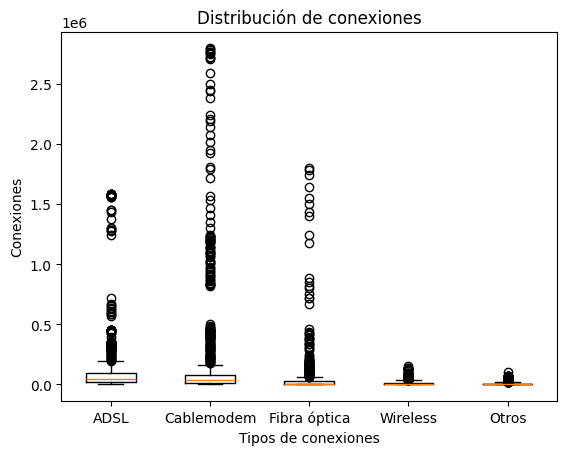

In [5]:
col = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
plt.boxplot(dfc[col])
plt.ylabel('Conexiones')
plt.xlabel('Tipos de conexiones')
plt.title('Distribución de conexiones')
plt.xticks(range(1, len(col) + 1), col)
plt.show()


Existe una mayor dispersion de los datos en conexiones con Cablemodem, seguida de Fibra Optica, ADSL, Wireless y  otros.

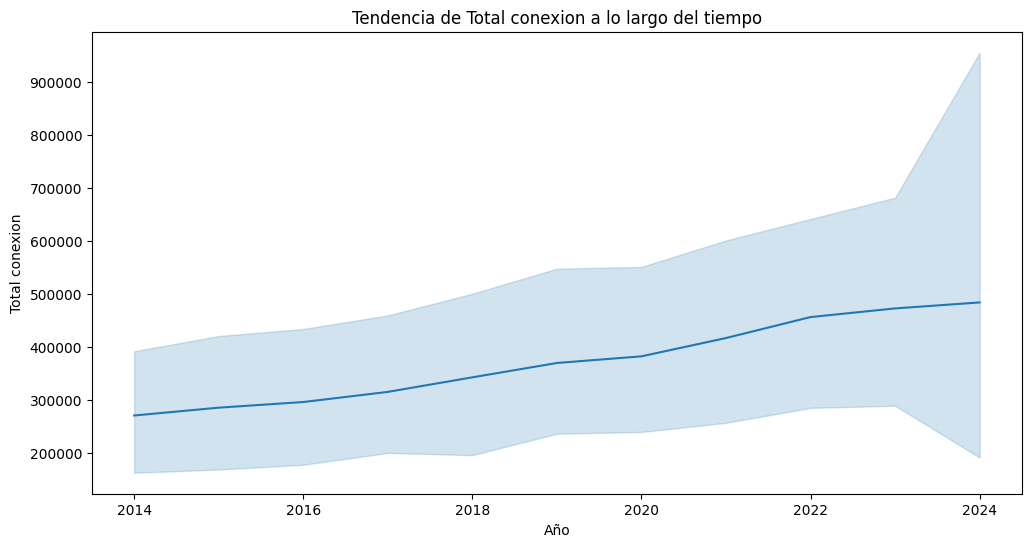

In [6]:
#Visualizamos variables Año, Trimestre, Provincia
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfc, x='Año', y='Total conexion')
plt.title('Tendencia de Total conexion a lo largo del tiempo')
plt.show()

Existe un incremento de las conexiones a lo largo de los años con una mayor tendencia a partir del año 2020.

In [7]:
años = dfc['Año'].value_counts()
trimestre = dfc['Trimestre'].value_counts()
provincia = dfc['Provincia'].value_counts()

print("Recuento de valores en la columna 'Año':")
print(años)
print("\nRecuento de valores en la columna 'Trimestre':")
print(trimestre)
print("\nRecuento de valores en la columna 'Provincia':")
print(provincia)

Recuento de valores en la columna 'Año':
Año
2014    96
2015    96
2016    96
2017    96
2018    96
2019    96
2020    96
2021    96
2022    96
2023    96
2024    24
Name: count, dtype: int64

Recuento de valores en la columna 'Trimestre':
Trimestre
1    264
2    240
3    240
4    240
Name: count, dtype: int64

Recuento de valores en la columna 'Provincia':
Provincia
Buenos Aires           41
Capital Federal        41
Tierra Del Fuego       41
Santiago Del Estero    41
Santa Fe               41
Santa Cruz             41
San Luis               41
San Juan               41
Salta                  41
Río Negro              41
Neuquén                41
Misiones               41
Mendoza                41
La Rioja               41
La Pampa               41
Jujuy                  41
Formosa                41
Entre Ríos             41
Córdoba                41
Corrientes             41
Chubut                 41
Chaco                  41
Catamarca              41
Tucumán                41
Name: 

In [8]:
print(dfc['Accesos por cada 100 hab'].describe())
print(dfc['Accesos por cada 100 hogares'].describe())

count    984.000000
mean      15.030488
std        9.212374
min        2.000000
25%        8.000000
50%       13.000000
75%       19.250000
max       52.000000
Name: Accesos por cada 100 hab, dtype: float64
count    984.000000
mean      52.159491
std       24.036101
min        9.347208
25%       33.204632
50%       49.435000
75%       65.706626
max      124.061394
Name: Accesos por cada 100 hogares, dtype: float64


EL acceso por cada 100 habitantes, encontramos que posee una media de 15.03, mientras que por cada hogar es mayor siendo un 52.16, con un valor maximo de 124.061394.

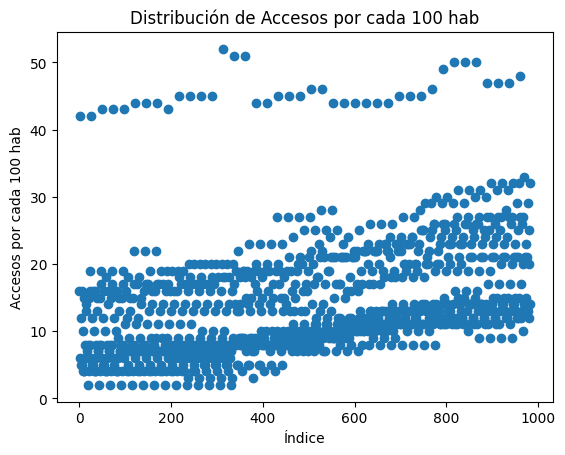

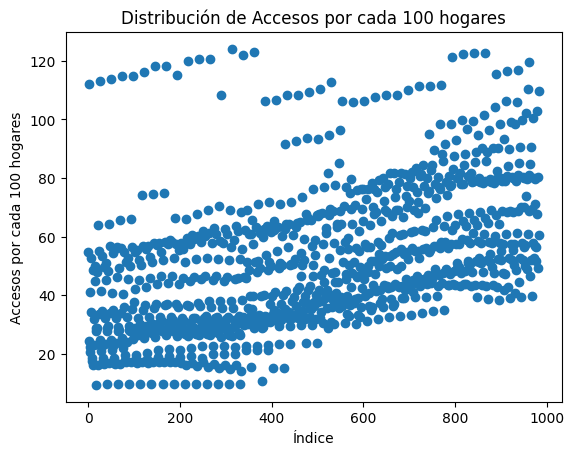

In [9]:
# Distribución de los datos: 
plt.plot(dfc['Accesos por cada 100 hab'], 'o')
plt.xlabel('Índice')
plt.ylabel('Accesos por cada 100 hab')
plt.title('Distribución de Accesos por cada 100 hab')
plt.show()

plt.plot(dfc['Accesos por cada 100 hogares'], 'o')
plt.xlabel('Índice')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Distribución de Accesos por cada 100 hogares')
plt.show()

In [10]:
# Variables Banda ancha fija y Dial Up
print(dfc['Banda ancha fija'].describe())
print(dfc['Dial up'].describe())

count    9.840000e+02
mean     3.636401e+05
std      7.829924e+05
min      1.219300e+04
25%      6.163725e+04
50%      1.116815e+05
75%      1.921412e+05
max      5.038657e+06
Name: Banda ancha fija, dtype: float64
count      984.000000
mean       905.279472
std       2289.848126
min          0.000000
25%          5.000000
50%        135.000000
75%        615.000000
max      15229.000000
Name: Dial up, dtype: float64


Observamos que la variable Banda Ancha Fija, tiene una media y valores maximos por encima de Dial Up.

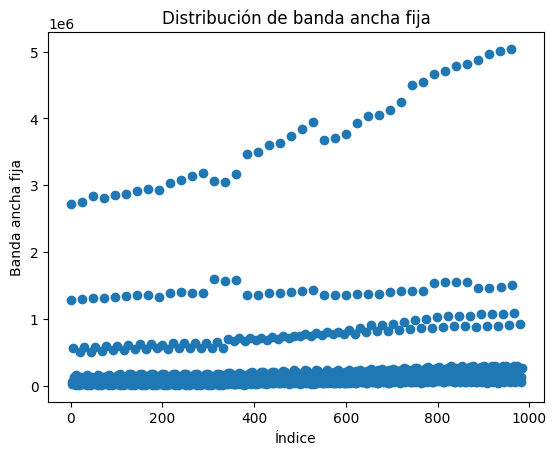

In [11]:
# Visualizacion de la distribución de Banda Ancha Fija: 
plt.plot(dfc['Banda ancha fija'], 'o')
plt.xlabel('Índice')
plt.ylabel('Banda ancha fija')
plt.title('Distribución de banda ancha fija')
plt.show()

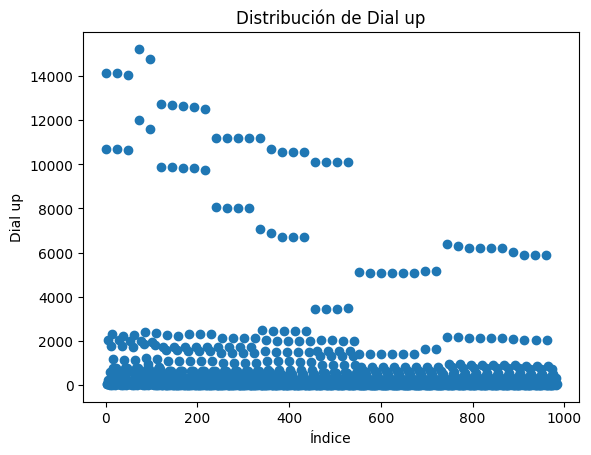

In [12]:
# Distribucion de Dial UP.
plt.plot(dfc['Dial up'], 'o')
plt.xlabel('Índice')
plt.ylabel('Dial up')
plt.title('Distribución de Dial up')
plt.show()

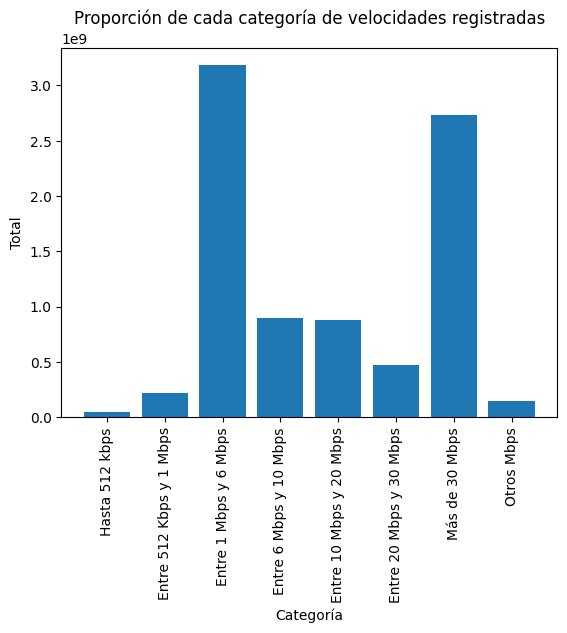

In [24]:
# De forma gráfica podemos ver la cantidad de cada velocidad registradas en el dataset
sizes = dfc[['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
                      'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps','Más de 30 Mbps', 'Otros Mbps']].sum()

labels = sizes.index
values = sizes.values

plt.bar(labels, values)
plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Proporción de cada categoría de velocidades registradas')
plt.xticks(rotation=90)
plt.show()

In [23]:
# De forma más profunda los análisis estadísticos de estas variables son:
estadistica_vel = dfc[['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
                      'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps','Más de 30 Mbps','Total suma Mbps']].describe()

estadisticas_totales= pd.concat([estadistica_vel])
print(estadisticas_totales)

       Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  Entre 1 Mbps y 6 Mbps  \
count      984.000000               984.000000           9.840000e+02   
mean     47210.390244            219239.463415           3.233344e+06   
std      48859.332172            190790.675323           1.508337e+06   
min       5675.000000             28521.000000           8.661520e+05   
25%      29708.000000             71742.000000           2.531271e+06   
50%      35030.000000            195706.000000           3.316868e+06   
75%      41064.000000            294413.000000           4.816081e+06   
max     241713.000000            687619.000000           5.153437e+06   

       Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
count            9.840000e+02             9.840000e+02   
mean             9.155820e+05             8.898369e+05   
std              2.294915e+05             4.504563e+05   
min              2.891820e+05             1.011270e+05   
25%              8.594130e+05             6.932770e+

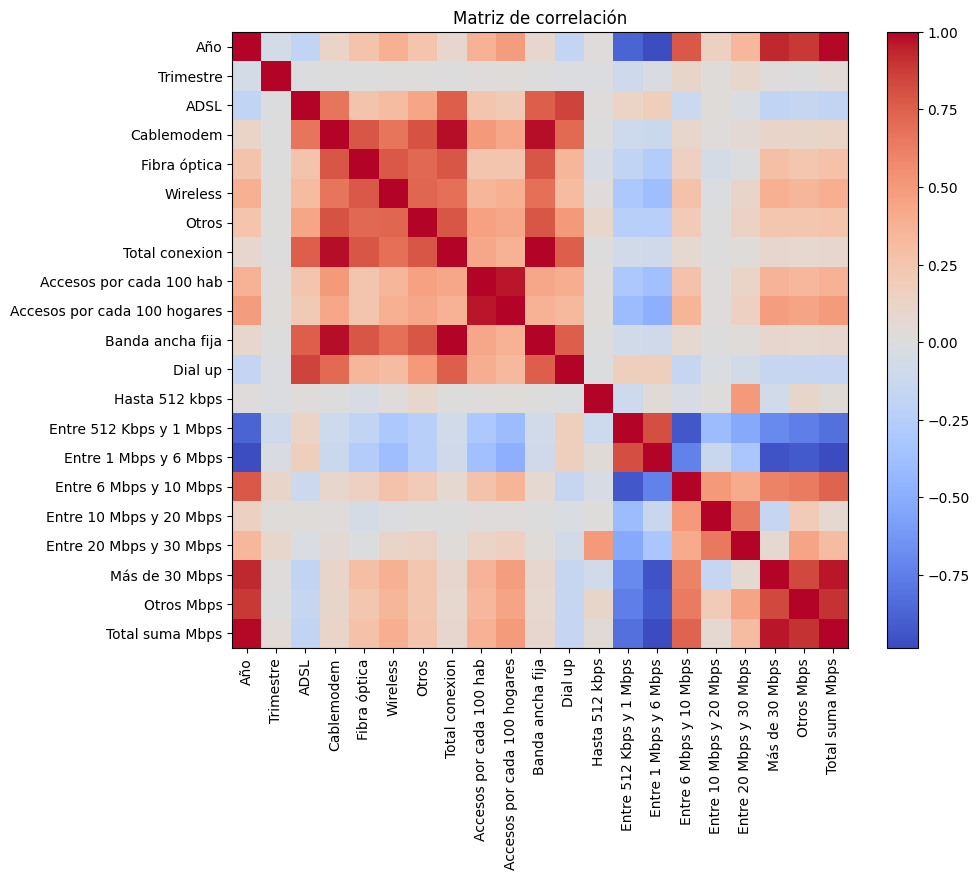

In [22]:
# Analisis bivariado - multivariado
corr_matrix = dfc.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matriz de correlación')
plt.show()

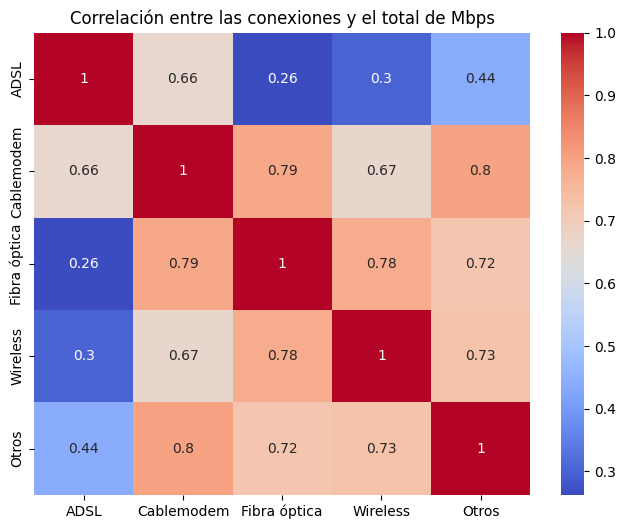

In [25]:
# Gráfico de correlación de las conexiones con el total de Mbps
conn_types = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_corr = dfc[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las conexiones y el total de Mbps')
plt.show()

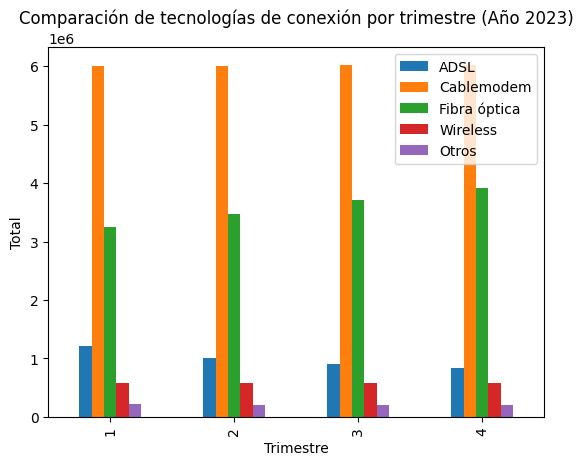

In [27]:
df_2023 = dfc[dfc['Año'] == 2023]

df_group = df_2023.groupby('Trimestre')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
df_group.plot(kind='bar')
plt.xlabel('Trimestre')
plt.ylabel('Total')
plt.title('Comparación de tecnologías de conexión por trimestre (Año 2023)')
plt.show()

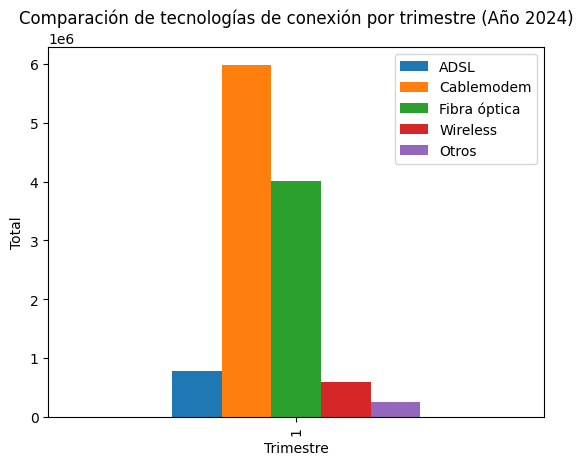

In [28]:
df_2024 = dfc[dfc['Año'] == 2024]

df_group = df_2024.groupby('Trimestre')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
df_group.plot(kind='bar')
plt.xlabel('Trimestre')
plt.ylabel('Total')
plt.title('Comparación de tecnologías de conexión por trimestre (Año 2024)')
plt.show()

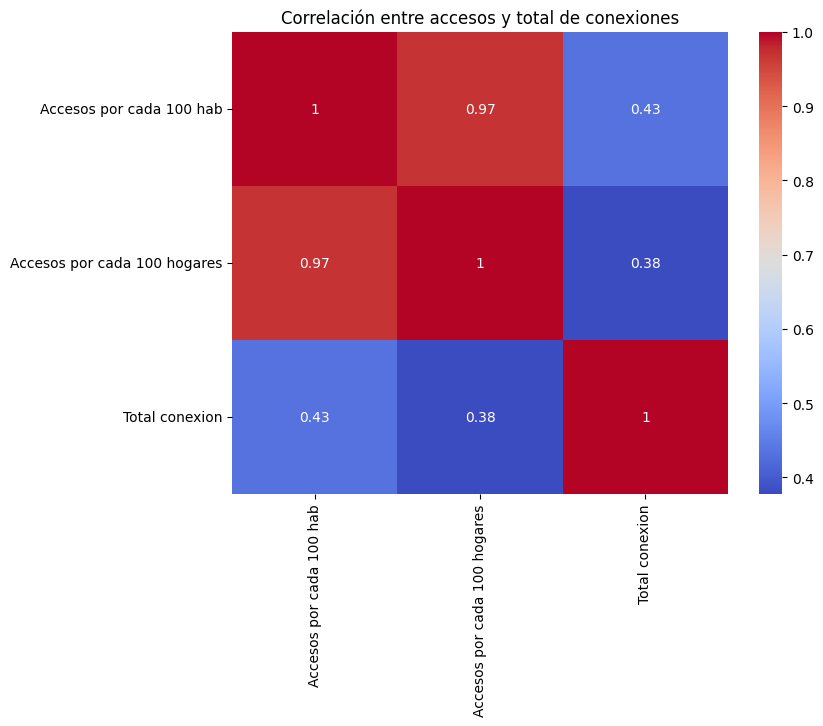

In [30]:
# Gráfico de correlación de los accesos
conn_types = ['Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Total conexion']
df_corr = dfc[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre accesos y total de conexiones')
plt.show()

---------------------


In [45]:
dfn = pd.read_csv('df_nac.csv')
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22464 entries, 0 to 22463
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 22464 non-null  int64  
 1   Año                        22464 non-null  int64  
 2   Trimestre                  22464 non-null  int64  
 3   Banda ancha fija           22464 non-null  int64  
 4   Dial up                    22464 non-null  int64  
 5   Mbps (Media de bajada)     22464 non-null  float64
 6   Trimestre.1                22464 non-null  object 
 7   Provincia_x                22464 non-null  object 
 8   Hasta 512 kbps             22464 non-null  float64
 9   Entre 512 Kbps y 1 Mbps    22464 non-null  float64
 10  Entre 1 Mbps y 6 Mbps      22464 non-null  float64
 11  Entre 6 Mbps y 10 Mbps     22464 non-null  float64
 12  Entre 10 Mbps y 20 Mbps    22464 non-null  float64
 13  Entre 20 Mbps y 30 Mbps    22464 non-null  flo

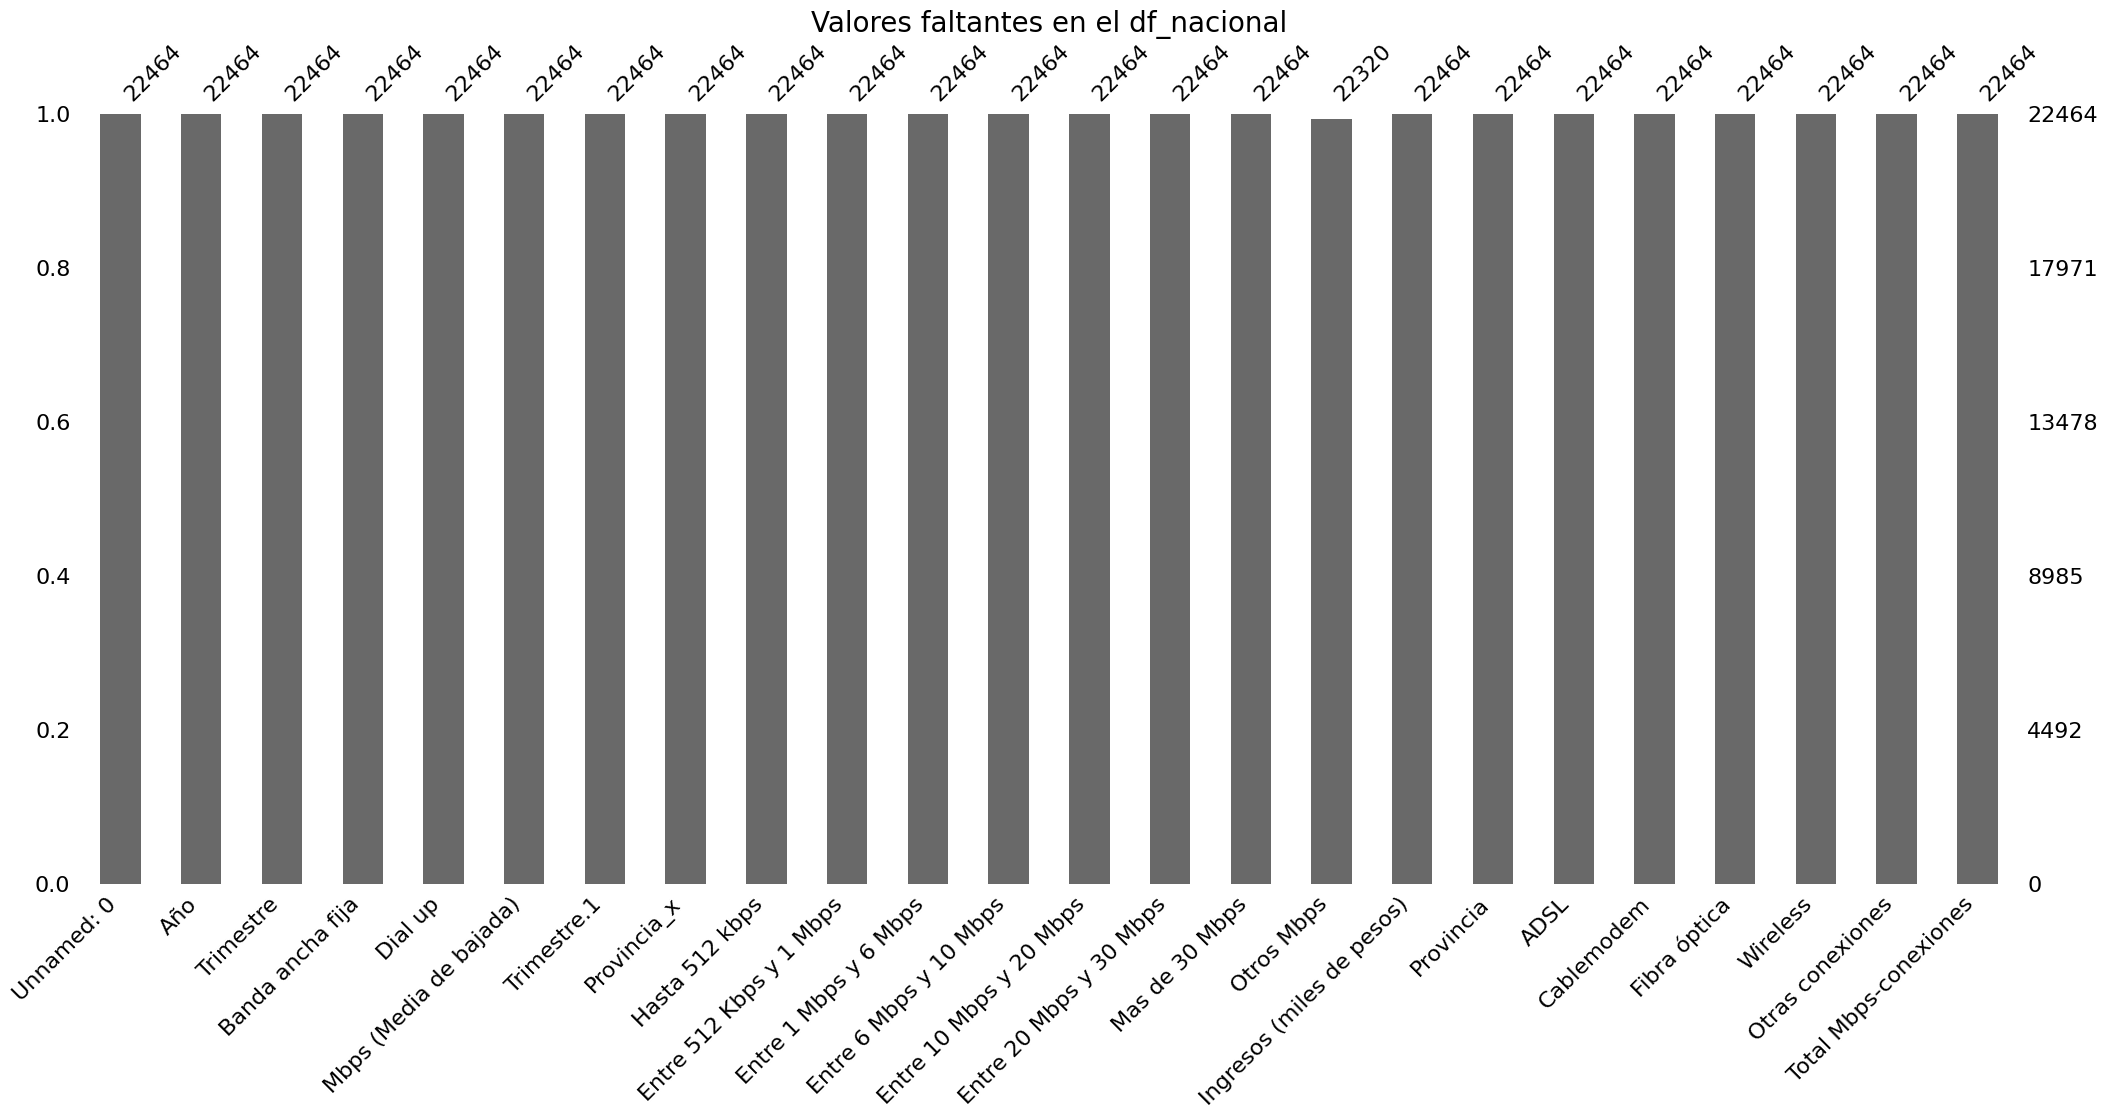

In [34]:
# Revisamos los valores faltantes del df
msno.bar(dfn)
plt.title('Valores faltantes en el df_nacional', fontsize=20) 
plt.show() # nuevamente vemos que no hay valores faltantes

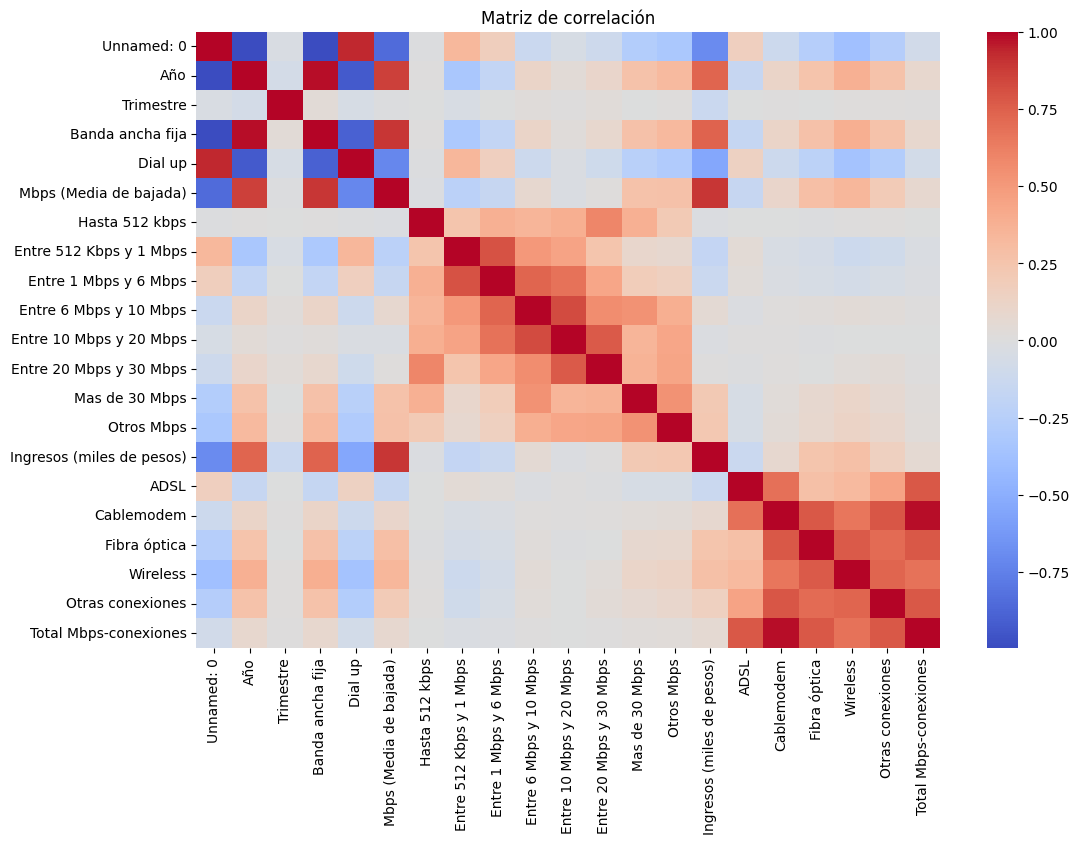

In [35]:
# Correlacion para las variables numericas
df_numeric = dfn.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [37]:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_estadisticos = dfn[columnas].describe()
print(df_estadisticos)

               ADSL    Cablemodem  Fibra óptica       Wireless  \
count  2.246400e+04  2.246400e+04  2.246400e+04   22464.000000   
mean   1.187504e+05  1.798413e+05  4.206661e+04   11778.537393   
std    2.435841e+05  4.416678e+05  1.624545e+05   20249.856163   
min    2.827000e+03  0.000000e+00  0.000000e+00       0.000000   
25%    2.129625e+04  1.021200e+04  2.700000e+02     595.000000   
50%    4.576200e+04  3.880100e+04  1.995000e+03    4819.000000   
75%    9.191975e+04  7.437100e+04  2.203975e+04   13431.750000   
max    1.586343e+06  2.790663e+06  1.799013e+06  150290.000000   

       Otras conexiones  
count      22464.000000  
mean        6455.367521  
std        11373.942183  
min            2.000000  
25%          318.250000  
50%         1875.000000  
75%         7212.750000  
max       101294.000000  


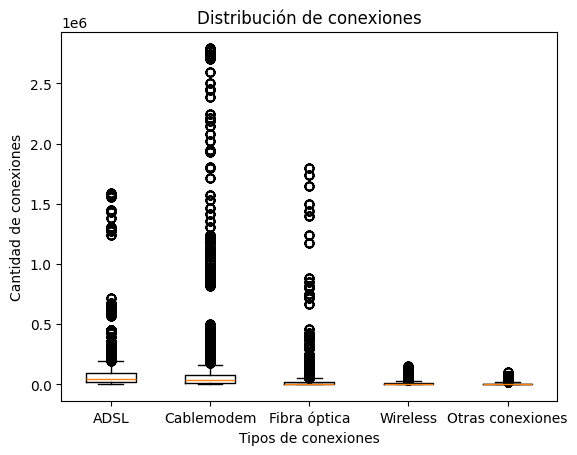

In [38]:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
plt.boxplot(dfn[columnas])
plt.ylabel('Cantidad de conexiones')
plt.xlabel('Tipos de conexiones')
plt.title('Distribución de conexiones')
plt.xticks(range(1, len(columnas) + 1), columnas)
plt.show()

Text(0.5, 1.0, 'Correlación entre las conexiones y el total de Mbps')

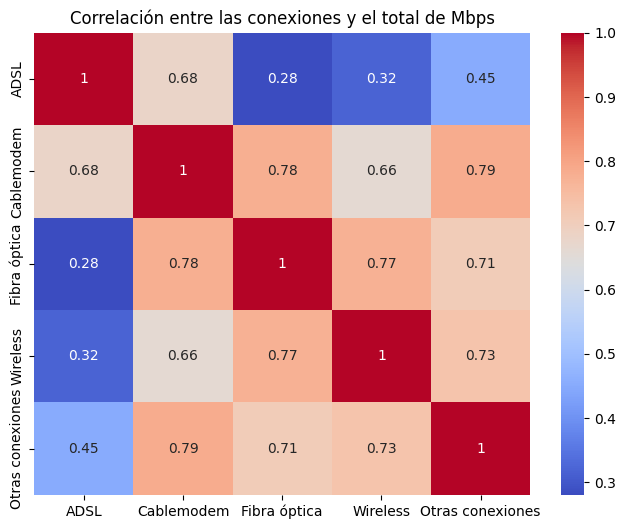

In [39]:
 #correlación de las conexiones con el total de Mbps
conn_types =  ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_corr = dfn[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las conexiones y el total de Mbps')

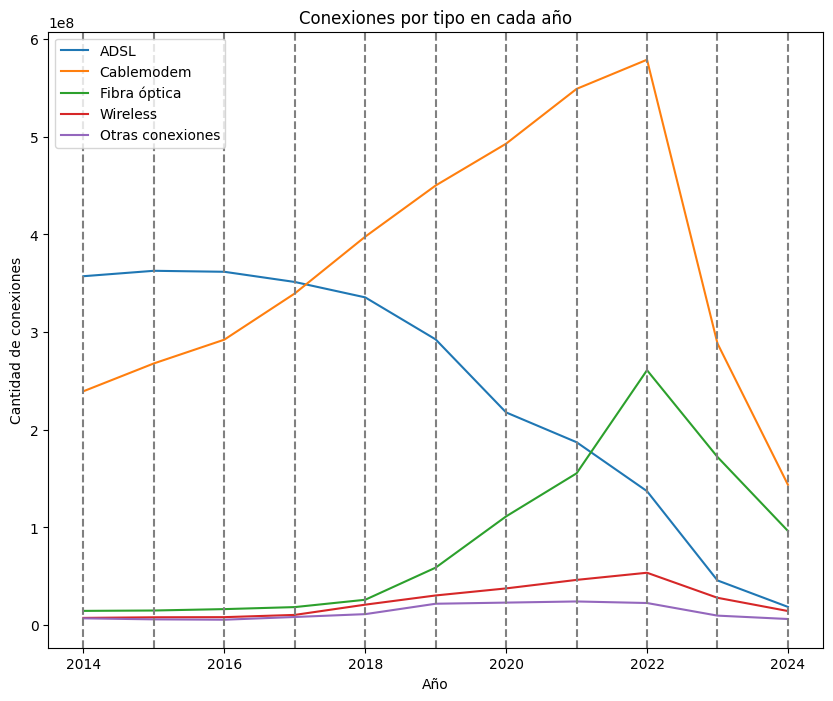

In [40]:
# Comparo conexiones por año
conn_types =  ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_conn_types = dfn[conn_types].groupby(dfn['Año']).sum()

plt.figure(figsize=(10, 8))
for conn_type in conn_types:
    plt.plot(df_conn_types.index, df_conn_types[conn_type], label=conn_type)

plt.title('Conexiones por tipo en cada año')
plt.xlabel('Año')
plt.ylabel('Cantidad de conexiones')
plt.legend(loc='upper left')

# Agregar líneas verticales de las etiquetas del eje x
for year in df_conn_types.index:
    plt.axvline(x=year, color='gray', linestyle='--')

plt.show()

-------------------------------------------


In [ ]:
dfp = pd.read_csv(r"df_partido.csv")
dfp.info()

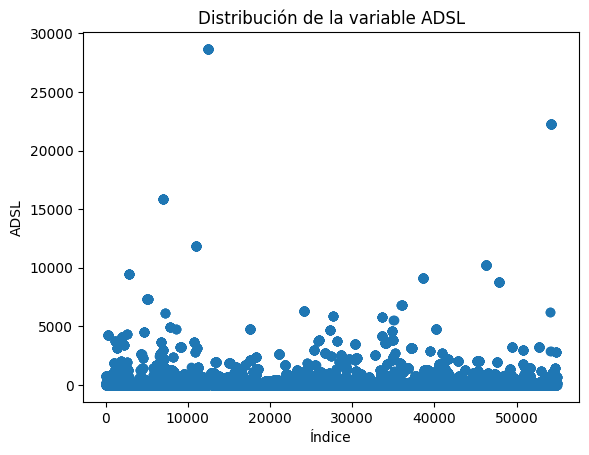

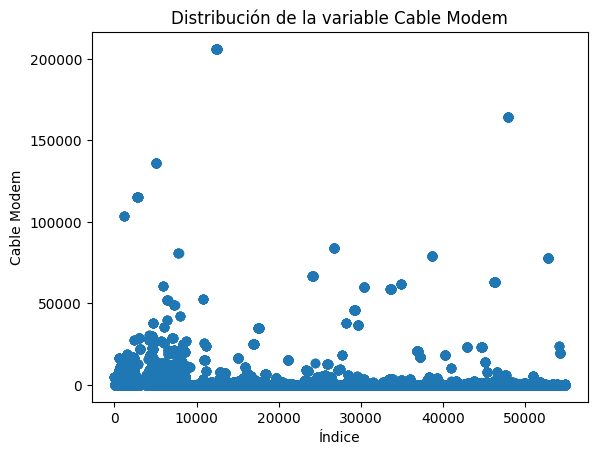

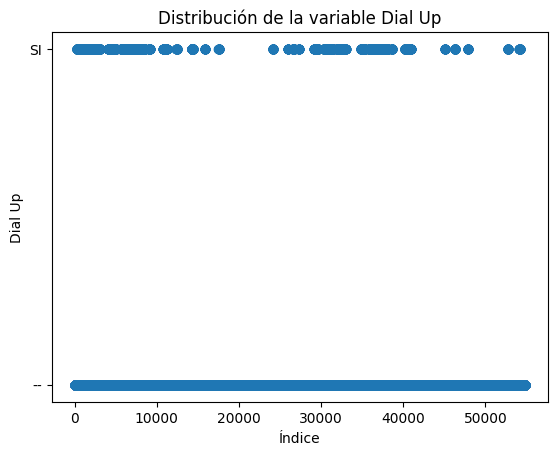

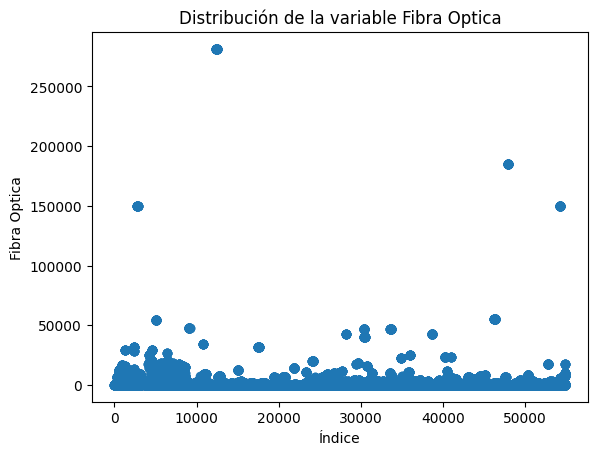

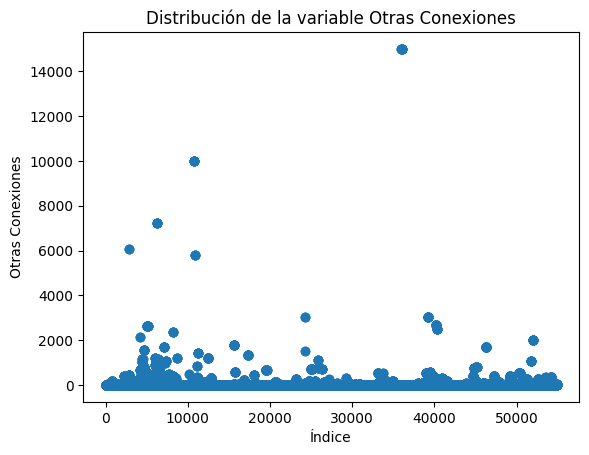

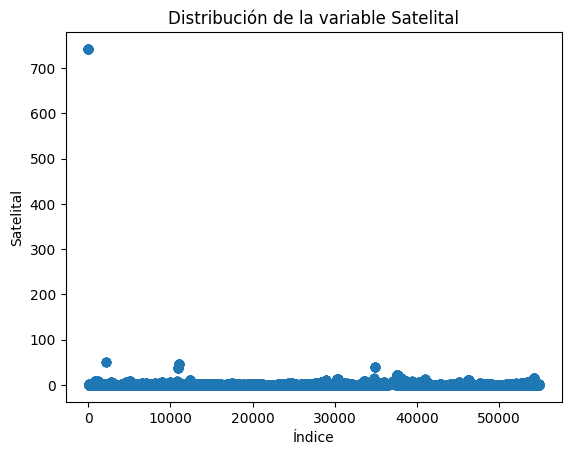

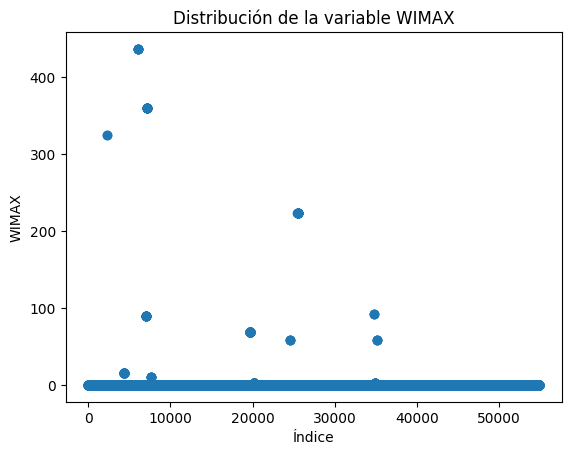

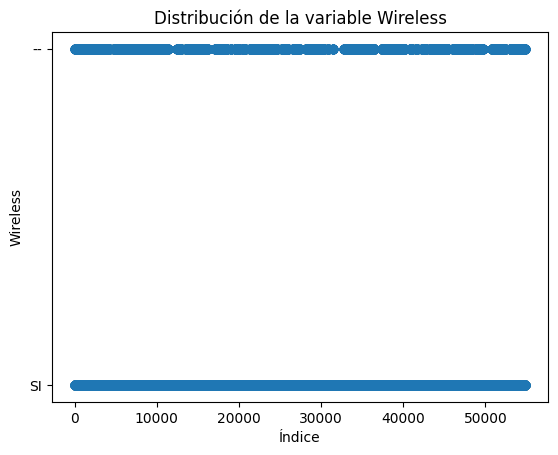

In [50]:
# Lista de columnas para analizar
columnas = ['ADSL', 'Cable Modem', 'Dial Up', 'Fibra Optica', 'Otras Conexiones', 'Satelital', 'WIMAX', 'Wireless']

# Iterar sobre las columnas y generar gráficos de dispersión
for columna in columnas:
    plt.scatter(range(len(dfp)), dfp[columna])
    plt.xlabel('Índice')
    plt.ylabel(columna)
    plt.title(f'Distribución de la variable {columna}')
    plt.show()

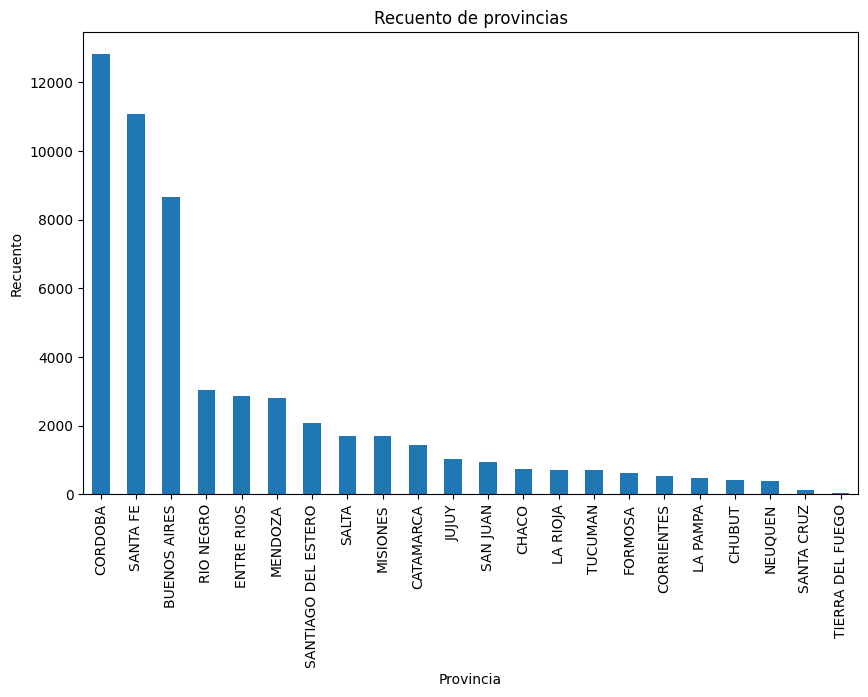

In [52]:
# Recuento de provincias
cuenta_provincia = dfp['Provincia'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
cuenta_provincia.plot(kind='bar')
plt.xlabel('Provincia')
plt.ylabel('Recuento')
plt.title('Recuento de provincias')
plt.show()

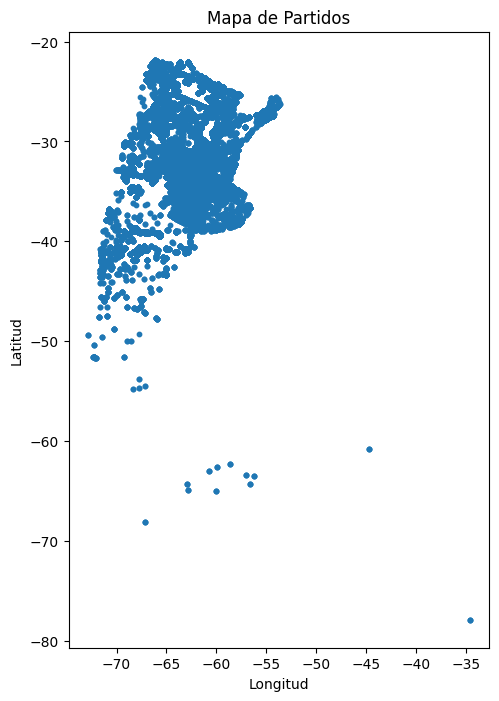

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt

dfp['Latitud'] = dfp['Latitud'].apply(lambda x: str(x).replace('..', '.')).astype(float)
dfp['Longitud'] = dfp['Longitud'].apply(lambda x: str(x).replace('..', '.')).astype(float)

# Crear un objeto GeoDataFrame a partir de las columnas "Latitud" y "Longitud"
geometry = gpd.points_from_xy(dfp['Longitud'], dfp['Latitud'])
gdf = gpd.GeoDataFrame(dfp, geometry=geometry)

# Crear el mapa
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, markersize=10)

# Añadir título y etiquetas
ax.set_title('Mapa de Partidos')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()

Algunas coordenadas del datset se encuentran registradas con error por lo que los puntos correspondientes a esas localidades, escapan del mapa.

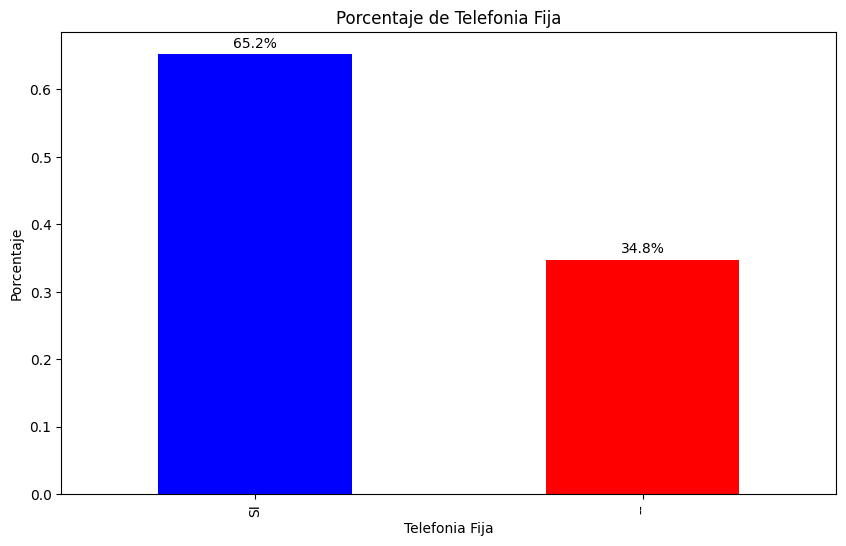

In [54]:
colores = ['blue', 'red']
plt.figure(figsize=(10, 6))
counts = dfp['Telefonia Fija'].value_counts(normalize=True)
ax = counts.plot(kind='bar', color=colores)

# Mostrar porcentajes en las etiquetas de las barras
for i, count in enumerate(counts):
    ax.text(i, count + 0.01, f'{count*100:.1f}%', ha='center')

plt.xlabel('Telefonia Fija')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Telefonia Fija')
plt.show()

---

In [55]:
dfi = pd.read_csv('df_indicadores.csv')
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      22 non-null     int64  
 1   Año             22 non-null     int64  
 2   Trimestre       22 non-null     int64  
 3   IPC US          22 non-null     int64  
 4   IPC AR          22 non-null     int64  
 5   USDARS oficial  22 non-null     float64
 6   USDARS blue     22 non-null     float64
 7   PBI millones    22 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 1.5 KB


In [56]:
estadisticas = dfi[['Año', 'Trimestre']].describe()
print(estadisticas)

               Año  Trimestre
count    22.000000  22.000000
mean   2015.272727   2.409091
std       1.638287   1.140555
min    2013.000000   1.000000
25%    2014.000000   1.250000
50%    2015.000000   2.000000
75%    2016.750000   3.000000
max    2018.000000   4.000000


In [57]:
unicos = dfi['Año'].nunique()
print(f"Número de años únicos: {unicos}")

Número de años únicos: 6


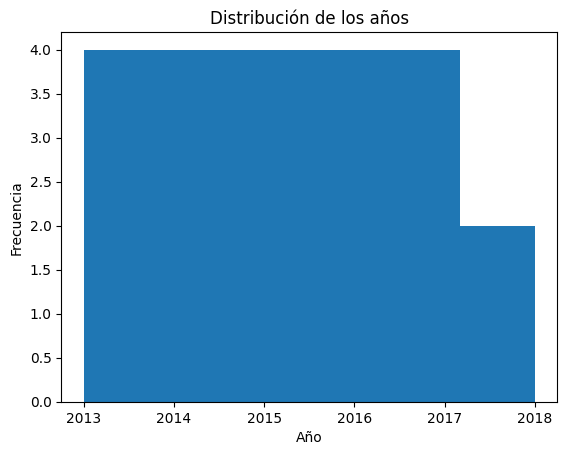

In [58]:
plt.hist(dfi['Año'], bins='auto')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de los años')
plt.show()

In [59]:
estad = dfi[['IPC US','IPC AR']].describe()
print(estad)

              IPC US       IPC AR
count      22.000000    22.000000
mean   239811.500000   657.000000
std      5470.373764   268.532697
min    232773.000000   298.000000
25%    236162.500000   440.000000
50%    238237.500000   602.500000
75%    243208.750000   868.250000
max    251989.000000  1169.000000


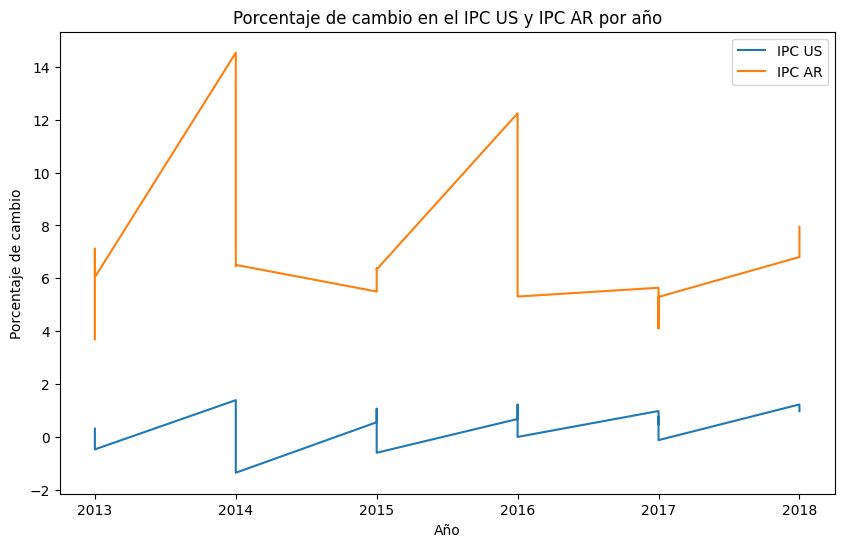

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(dfi['Año'], dfi['IPC US'].pct_change() * 100, label='IPC US')
plt.plot(dfi['Año'], dfi['IPC AR'].pct_change() * 100, label='IPC AR')
plt.xlabel('Año')
plt.ylabel('Porcentaje de cambio')
plt.title('Porcentaje de cambio en el IPC US y IPC AR por año')
plt.legend()
plt.show()